In [1]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: >

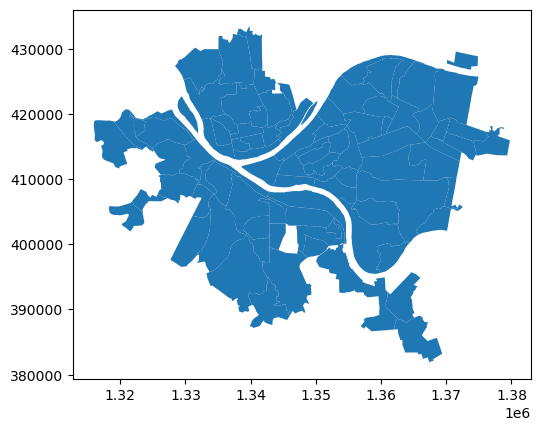

In [3]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot()

***Introduction***

In this project, we aim to identify the best neighborhood in Pittsburgh using a data-driven approach. The definition of "best" can vary widely depending on the criteria — safety, walkability, green space, income, education levels, or even subjective personal preferences. For this analysis, we chose to define the best neighborhood based on aggregate household income in the past 12 months, adjusted to 2015 dollars.

Our reasoning is that a neighborhood with a high total income likely reflects a combination of desirable characteristics: economic opportunity, employment, property value, and general livability. While not perfect, aggregate income is a proxy for neighborhood prosperity and can help spotlight areas with stronger economic foundations.

We explored a few alternative metrics before finalizing our choice. These included:

- Median household income, which we considered but ultimately dismissed because it doesn't account for neighborhood size or population.

- Sidewalk-to-street ratio, which is a great measure of walkability, but felt too narrowly focused.

Ultimately, we decided that total annual income per neighborhood would serve as a compelling and straightforward metric — it's both quantifiable and available through open datasets. We visualized this metric on a map using choropleth techniques, which helped us compare neighborhoods at a glance and identify economic hotspots across the city.

In the following sections, we will define the metric in more detail, discuss the datasets used, and apply this metric to determine which Pittsburgh neighborhood ranks as the best.

In [4]:
income_df = pd.read_csv("aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv", dtype={"Neighborhood": str})
print(income_df.columns)
income_df.rename(columns={
    'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)': 'IncomeEstimate'
}, inplace=True)
merged = neighborhoods.merge(income_df, left_on='hood', right_on='Neighborhood')

Index(['Neighborhood', 'Id',
       'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)',
       'Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)'],
      dtype='object')


To evaluate what makes a neighborhood `the best`, we selected a simple but powerful metric:

- Aggregate household income in the past 12 months (adjusted to 2015 dollars)

This metric comes from the WPRDC (Western Pennsylvania Regional Data Center), where each record corresponds to a Pittsburgh neighborhood. The field name in the dataset is:

Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)

I chose this metric because it captures the total economic activity of a neighborhood, rather than just the income level of an average household. Unlike median household income (which reflects a typical resident), aggregate income represents the entire neighborhood's economic capacity, accounting for both population size and wealth.

I used two main datasets:

**Neighborhoods (Shapefile)**

Source: WPRDC
Organization: City of Pittsburgh
Purpose: Geographic visualization and spatial join

**Aggregated household Income in the past 12 years data**

Source: WPRDC - Pittsburgh American Community Survey 2015 - Miscellaneous DataAggregate Household Income
Organization: City of Pittsburgh
Includes neighborhood names and estimated income values

Using GeoPandas, I merged the shapefile with the income dataset to create a choropleth map. This allows me to visualize income variation across neighborhoods using color intensity. I also cleaned the data by converting non-numeric entries (e.g., "-") to NaN and dropping invalid rows to ensure accuracy.



Text(0.5, 1.0, 'Pittsburgh Neighborhood Income (Linear Color Mapping)')

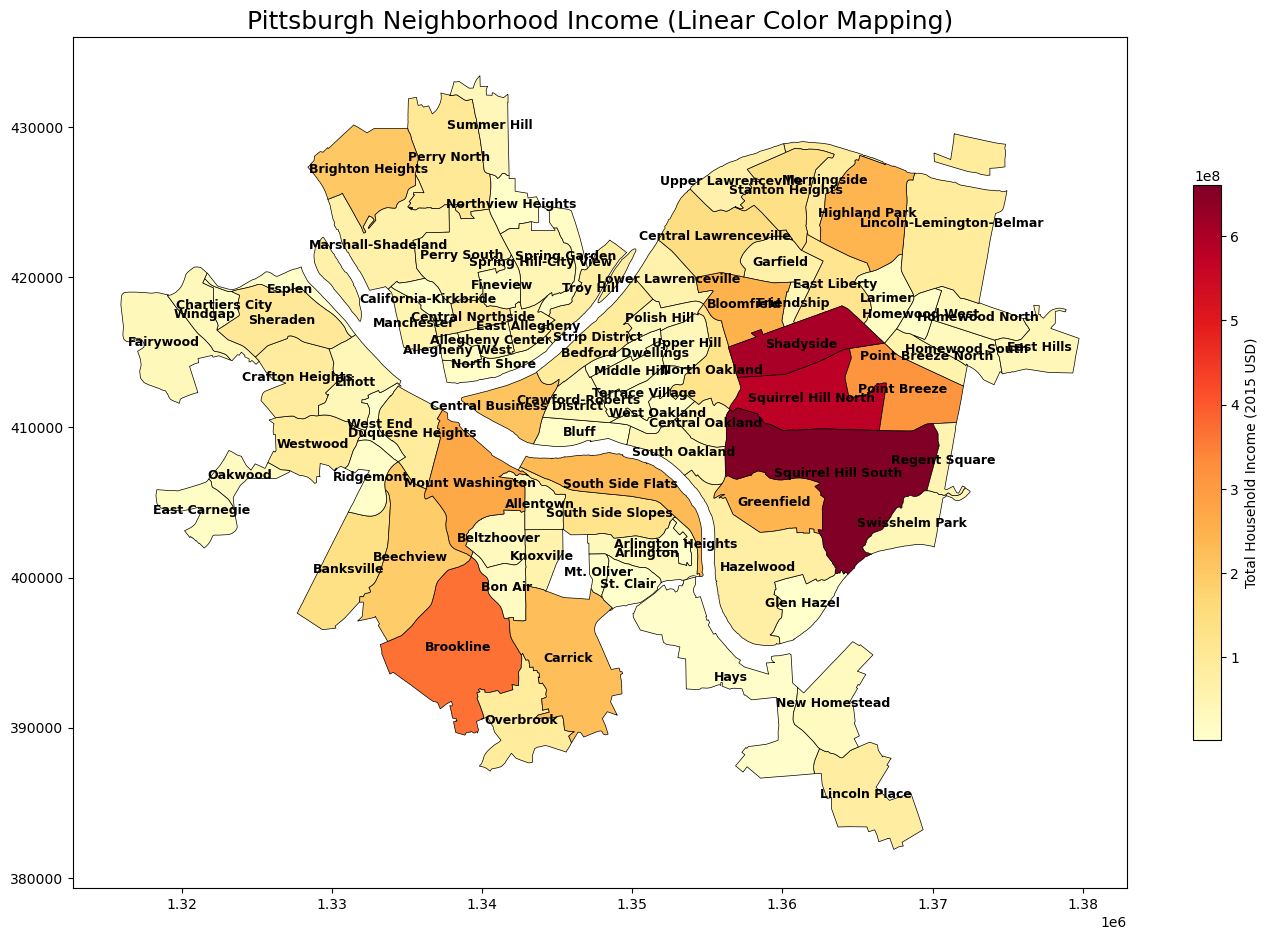

In [5]:
merged["IncomeEstimate"] = pd.to_numeric(merged["IncomeEstimate"], errors="coerce")
merged = merged.dropna(subset=["IncomeEstimate"])

vmin = merged["IncomeEstimate"].min()
vmax = merged["IncomeEstimate"].max()

fig, ax = plt.subplots(1, 1, figsize=(17, 12))

merged.plot(
    column="IncomeEstimate",
    cmap="YlOrRd",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax,
    vmin=vmin,
    vmax=vmax,
    legend_kwds={
        'label': "Total Household Income (2015 USD)",
        'orientation': "vertical",
        'shrink': 0.6  
    }
)

top10 = merged.sort_values("IncomeEstimate", ascending=False)
for idx, row in top10.iterrows():
    x, y = row["geometry"].centroid.coords[0]
    ax.text(x, y, row["Neighborhood"], fontsize=9, ha='center', va='center', color='black', fontweight='bold')

ax.set_title("Pittsburgh Neighborhood Income (Linear Color Mapping)", fontsize=18)
##ax.axis("off")

Text(0.5, 1.0, 'Pittsburgh Neighborhood Income (Linear Color Mapping)')

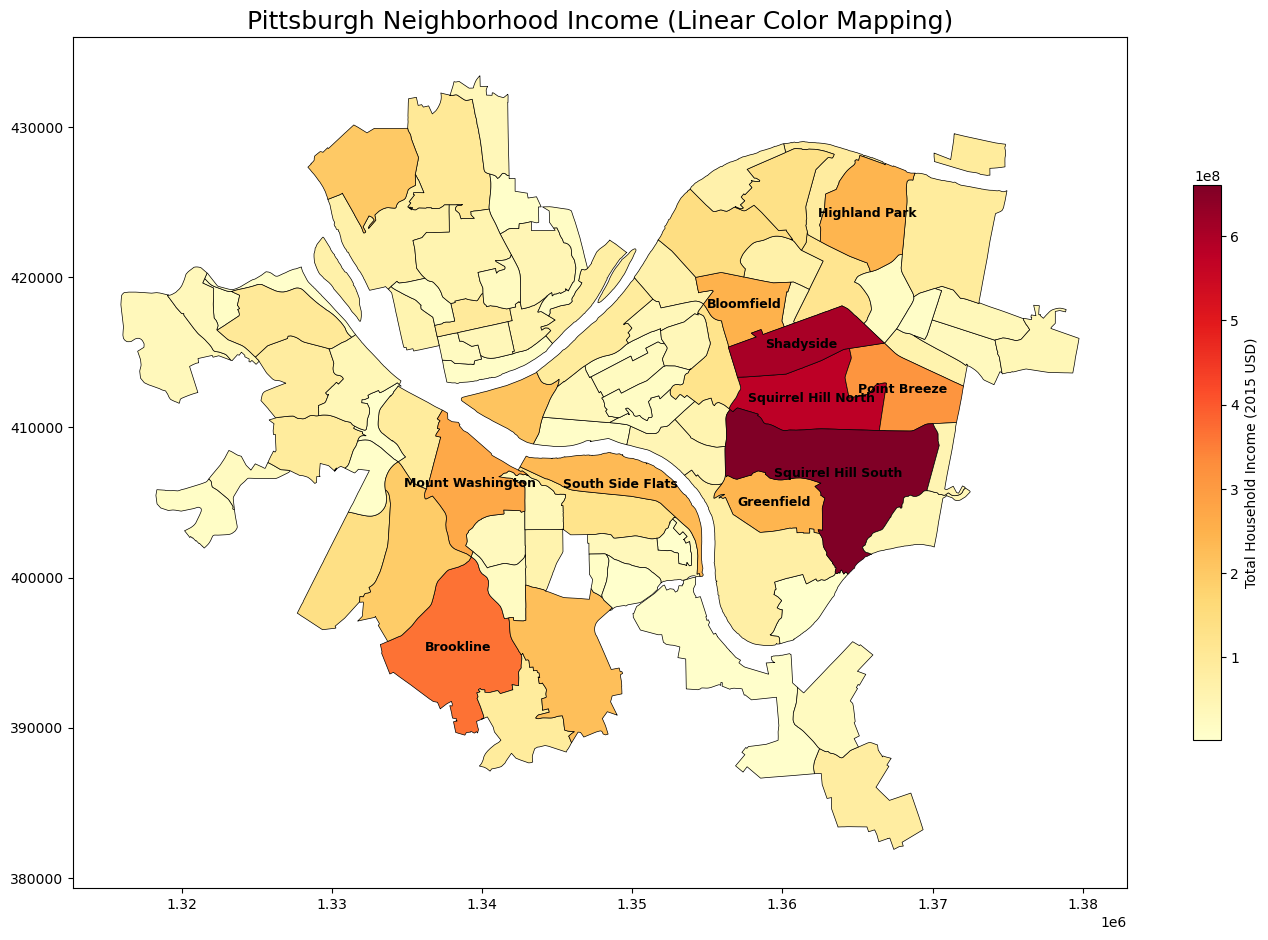

In [6]:
merged["IncomeEstimate"] = pd.to_numeric(merged["IncomeEstimate"], errors="coerce")
merged = merged.dropna(subset=["IncomeEstimate"])

vmin = merged["IncomeEstimate"].min()
vmax = merged["IncomeEstimate"].max()

fig, ax = plt.subplots(1, 1, figsize=(17, 12))

merged.plot(
    column="IncomeEstimate",
    cmap="YlOrRd",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax,
    vmin=vmin,
    vmax=vmax,
    legend_kwds={
        'label': "Total Household Income (2015 USD)",
        'orientation': "vertical",
        'shrink': 0.6  
    }
)

top10 = merged.sort_values("IncomeEstimate", ascending=False).head(10)
for idx, row in top10.iterrows():
    x, y = row["geometry"].centroid.coords[0]
    ax.text(x, y, row["Neighborhood"], fontsize=9, ha='center', va='center', color='black', fontweight='bold')

ax.set_title("Pittsburgh Neighborhood Income (Linear Color Mapping)", fontsize=18)
##ax.axis("off")

Based on our selected metric — aggregate household income in the past 12 months — we ranked all neighborhoods in Pittsburgh and found that the neighborhood with the highest total income is:

Squirrel Hill South

This neighborhood recorded an estimated $659,886,300 in household income (adjusted to 2015 dollars), placing it well above all others.

This indicates not only a large number of households but also relatively high average household income, pointing to a strong economic base.

In the map, darker shades represent higher total income. As we can see, this neighborhood stands out both in spatial size and in color intensity:


So why is this the "best" neighborhood? From a purely economic standpoint, high total income suggests:

Greater economic resources and investment capacity;
Access to better infrastructure and public services;
Attraction of middle- to high-income residents;
Likely correlation with good schools, safety, and quality of life.

While we acknowledge that “best” is a subjective and multidimensional concept, from a quantitative economic perspective, this neighborhood clearly leads the city.

**Conclusion**

Although our analysis identified Squirrel Hill South as the best neighborhood in Pittsburgh based on aggregate household income, my personal favorite is Shadyside.

Shadyside may not have the highest income total, but I love its atmosphere. It's walkable, full of local shops and cafés, and feels both vibrant and peaceful. As a student, I enjoy spending time there — it's not just convenient, but also full of character. The streets are beautiful, and there's a unique charm that makes it feel like a small town within the city.

This reminds me that while data can help us define "best" in objective terms, the feeling of belonging, comfort, and everyday experience often matters more.


---

**Income Score**

In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [22]:
merged.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,Neighborhood,Id,IncomeEstimate,Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((1368776.881 416103.51, 1368896.146 4...",Point Breeze North,65,59572300.0,9198290.554
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((1364415.483 412107.835, 1364443.307 ...",Squirrel Hill North,77,577467500.0,66363783.65
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((1360545.145 422529.993, 1360587.544 ...",Garfield,35,67632800.0,16399392.03
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((1351889.105 416415.515, 1351902.109 ...",Bedford Dwellings,7,10529100.0,1666825
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((1345380.681 403212.583, 1345366.107 ...",Knoxville,44,60537300.0,11423844.9


In [24]:
income_score = merged[["Neighborhood", "IncomeEstimate"]].copy()
income_score = income_score.sort_values("IncomeEstimate", ascending=False)
income_score.head()

,Neighborhood,IncomeEstimate
80,Squirrel Hill South,659886300.0
75,Shadyside,605635700.0
1,Squirrel Hill North,577467500.0
24,Brookline,366945900.0
59,Point Breeze,314958500.0


In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Create the scaled score column
income_score["IncomeScore"] = scaler.fit_transform(income_score[["IncomeEstimate"]])
income_score.head()

,Neighborhood,IncomeEstimate,IncomeScore
80,Squirrel Hill South,659886300.0,1.000000
75,Shadyside,605635700.0,0.917489
1,Squirrel Hill North,577467500.0,0.874648
24,Brookline,366945900.0,0.554461
59,Point Breeze,314958500.0,0.475392


In [28]:
income_score.to_csv("income_scores.csv", index=False)